In [1]:
pwd

'E:\\DataScience\\MachineLearning\\Phising_Training_Dataset'

In [2]:
import os 
os.listdir()

['.ipynb_checkpoints',
 'Phising_Testing_Dataset.csv',
 'Phising_Training_Dataset.csv',
 'sample_submission.csv',
 'Untitled.ipynb']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from wordcloud import WordCloud
from scipy import signal
import scipy
#to supress warning
import warnings
warnings.filterwarnings('ignore')


#to make shell more intractive
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')


In [4]:
path ='E:\\DataScience\\MachineLearning\\Phising_Training_Dataset'

In [5]:
train_df  =pd.read_csv(path+"\\Phising_Training_Dataset.csv") 
test_df   =pd.read_csv(path+"\\Phising_Testing_Dataset.csv") 
sample_sub=pd.read_csv(path+"\\sample_submission.csv") 

In [6]:
train_df.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [7]:
test_df.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [8]:
sample_sub.head()

,key,Result
0,21338,-1
1,21339,1
2,21340,1
3,21341,1
4,21342,-1


In [9]:
train_df.columns

Index(['key', 'having_IP', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [10]:
train_df.shape

(8955, 32)

In [19]:
train_df.drop(['key','Domain_registeration_length'], axis = 1, inplace = True)

In [20]:
train_df.describe().T.style.background_gradient(cmap = 'rocket_r')

,count,mean,std,min,25%,50%,75%,max
having_IP,8955.000000,0.307203,0.951697,-1.000000,-1.000000,1.000000,1.000000,1.000000
URL_Length,8955.000000,-0.635734,0.763660,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
Shortining_Service,8955.000000,0.740480,0.672116,-1.000000,1.000000,1.000000,1.000000,1.000000
having_At_Symbol,8955.000000,0.709436,0.704809,-1.000000,1.000000,1.000000,1.000000,1.000000
double_slash_redirecting,8955.000000,0.740704,0.671870,-1.000000,1.000000,1.000000,1.000000,1.000000
Prefix_Suffix,8955.000000,-0.735343,0.677733,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
having_Sub_Domain,8955.000000,0.071803,0.817419,-1.000000,-1.000000,0.000000,1.000000,1.000000
SSLfinal_State,8955.000000,0.264545,0.908003,-1.000000,-1.000000,1.000000,1.000000,1.000000
Favicon,8955.000000,0.623227,0.782084,-1.000000,1.000000,1.000000,1.000000,1.000000
port,8955.000000,0.735343,0.677733,-1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
train_df.corr().style.background_gradient(cmap = 'rocket_r')

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP,1.000000,-0.053184,0.399121,0.162727,0.388331,-0.010055,-0.083055,0.071759,0.086203,0.065463,0.346835,0.032203,0.103445,-0.004489,-0.012995,0.075712,0.322580,-0.299680,0.100507,0.058687,0.096831,0.074897,0.010264,-0.059877,0.013970,-0.088005,0.042025,-0.339673,-0.020243,0.094027
URL_Length,-0.053184,1.000000,-0.102147,-0.070171,-0.083623,0.053664,-0.004870,0.048650,-0.046556,-0.000149,-0.095062,0.244441,-0.028365,0.051372,0.404926,-0.015684,-0.109873,0.045777,-0.052842,-0.019104,-0.055383,-0.020666,0.197745,-0.046371,0.017214,0.160600,0.000906,-0.023217,-0.076373,0.059331
Shortining_Service,0.399121,-0.102147,1.000000,0.112393,0.841223,-0.088494,-0.033567,-0.061707,0.005180,-0.001731,0.751194,-0.035202,0.004144,-0.139200,-0.026090,0.048770,0.734771,-0.494392,0.070095,0.034852,0.038871,0.016820,-0.053322,0.441312,-0.054722,0.027620,0.191166,-0.190125,0.096561,-0.066170
having_At_Symbol,0.162727,-0.070171,0.112393,1.000000,0.091817,-0.011074,-0.056443,0.031472,0.320858,0.389837,0.105202,0.026982,0.062111,-0.078456,-0.009287,0.387511,0.212192,-0.025748,0.311913,0.257179,0.307084,0.319482,-0.011848,-0.040347,0.035172,-0.048638,0.052266,-0.021183,-0.086436,0.050045
double_slash_redirecting,0.388331,-0.083623,0.841223,0.091817,1.000000,-0.093561,-0.032389,-0.036930,0.037648,0.023906,0.752510,-0.023427,-0.002841,-0.132653,-0.047335,0.030909,0.717434,-0.554337,0.097400,0.023054,0.058287,0.009779,-0.047033,0.433107,-0.073786,0.009250,0.216002,-0.185197,0.081190,-0.037758
Prefix_Suffix,-0.010055,0.053664,-0.088494,-0.011074,-0.093561,1.000000,0.087054,0.258982,-0.005699,-0.024500,-0.075264,0.096219,0.348929,0.098991,0.003991,-0.050733,-0.086667,0.018698,0.018127,-0.029651,-0.012412,-0.035630,0.074091,-0.008066,0.112270,-0.010107,0.059577,0.063379,-0.014781,0.344660
having_Sub_Domain,-0.083055,-0.004870,-0.033567,-0.056443,-0.032389,0.087054,1.000000,0.265866,-0.016026,0.004470,-0.025517,0.103016,0.225146,0.087959,0.088461,0.010933,-0.025826,0.026559,-0.025532,0.010255,-0.026657,0.005246,0.114317,0.132470,-0.001427,0.130962,0.059754,-0.002065,0.086271,0.296728
SSLfinal_State,0.071759,0.048650,-0.061707,0.031472,-0.036930,0.258982,0.265866,1.000000,-0.019725,0.024495,-0.023252,0.190500,0.540123,0.168650,0.167303,0.002112,-0.045735,-0.025875,0.020442,0.007350,-0.017061,-0.013408,0.170103,0.053233,0.267394,0.070730,0.092084,-0.006427,0.048559,0.712543
Favicon,0.086203,-0.046556,0.005180,0.320858,0.037648,-0.005699,-0.016026,-0.019725,1.000000,0.791200,0.044693,-0.007760,0.035219,-0.099148,-0.016926,0.648181,0.075323,-0.017840,0.683005,0.400239,0.937124,0.602297,-0.007488,0.090112,-0.046961,0.009195,-0.011916,-0.124347,0.271378,-0.003260
port,0.065463,-0.000149,-0.001731,0.389837,0.023906,-0.024500,0.004470,0.024495,0.791200,1.000000,-0.003385,0.028677,0.039023,-0.062215,0.000793,0.790643,0.054261,-0.020773,0.586649,0.463662,0.731282,0.653360,-0.002218,0.044265,-0.025640,0.019871,0.004283,-0.134893,0.305514,0.033971


In [22]:
train_df.isnull().sum()

having_IP                   0
URL_Length                  0
Shortining_Service          0
having_At_Symbol            0
double_slash_redirecting    0
Prefix_Suffix               0
having_Sub_Domain           0
SSLfinal_State              0
Favicon                     0
port                        0
HTTPS_token                 0
Request_URL                 0
URL_of_Anchor               0
Links_in_tags               0
SFH                         0
Submitting_to_email         0
Abnormal_URL                0
Redirect                    0
on_mouseover                0
RightClick                  0
popUpWidnow                 0
Iframe                      0
age_of_domain               0
DNSRecord                   0
web_traffic                 0
Page_Rank                   0
Google_Index                0
Links_pointing_to_page      0
Statistical_report          0
Result                      0
dtype: int64

## Feature Selection  using Ensemble Techinique

#### Note : We cannot use Univariate feature selection since the data set contains -ve values

In [23]:
#Split the data into X and y 
X =train_df.iloc[:,:-1]
y =train_df.iloc[:,-1]

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

model.fit(X,y)
print(model.feature_importances_)

[0.01363495 0.00945962 0.00568583 0.00538277 0.00454753 0.05096349
 0.05771809 0.31284038 0.00554962 0.00265385 0.00705146 0.03118553
 0.23819077 0.04056941 0.02170388 0.00575256 0.0050204  0.00647836
 0.00385972 0.00219614 0.00547002 0.00299665 0.01785523 0.01283884
 0.07800406 0.01347081 0.01294319 0.02084476 0.00513207]


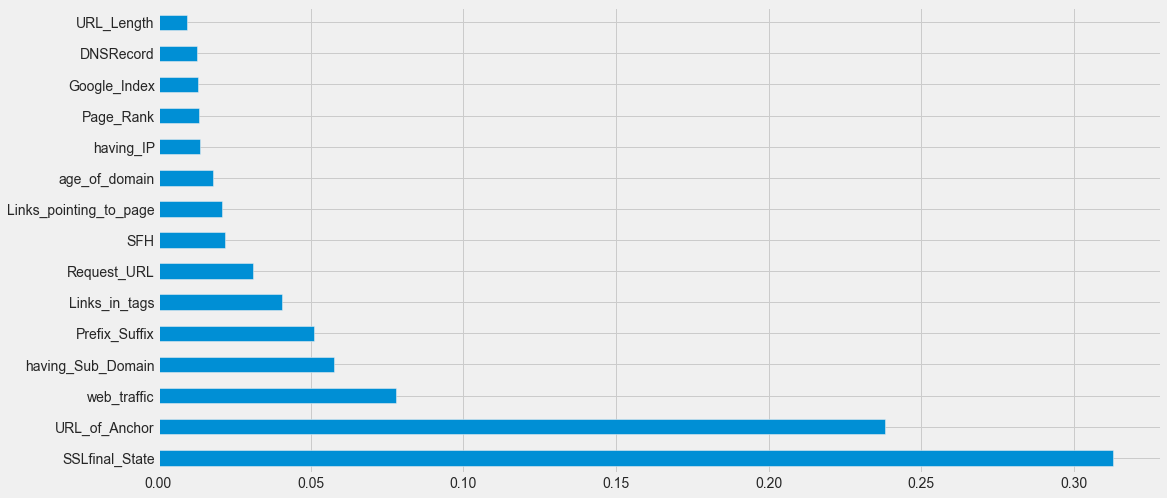

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [26]:
feat_importances.nlargest(15)

SSLfinal_State            0.312840
URL_of_Anchor             0.238191
web_traffic               0.078004
having_Sub_Domain         0.057718
Prefix_Suffix             0.050963
Links_in_tags             0.040569
Request_URL               0.031186
SFH                       0.021704
Links_pointing_to_page    0.020845
age_of_domain             0.017855
having_IP                 0.013635
Page_Rank                 0.013471
Google_Index              0.012943
DNSRecord                 0.012839
URL_Length                0.009460
dtype: float64

In [27]:
lis=feat_importances.nlargest(15).index

In [28]:
lis

Index(['SSLfinal_State', 'URL_of_Anchor', 'web_traffic', 'having_Sub_Domain',
       'Prefix_Suffix', 'Links_in_tags', 'Request_URL', 'SFH',
       'Links_pointing_to_page', 'age_of_domain', 'having_IP', 'Page_Rank',
       'Google_Index', 'DNSRecord', 'URL_Length'],
      dtype='object')

In [29]:
train_data=train_df.loc[:, train_df.columns.isin(lis)]

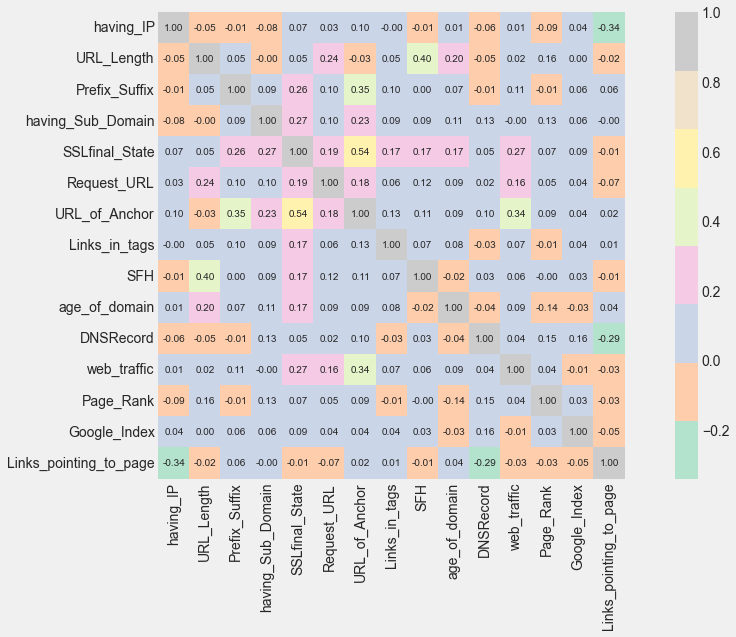

In [30]:
sns.heatmap(train_data.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Pastel2')
sns.set_style('darkgrid')

In [32]:
train_df['Result'].value_counts(normalize = True)

 1    0.562144
-1    0.437856
Name: Result, dtype: float64

In [33]:
# Independent variable and dependent variable
#Independent 
X = train_data
#dependent
y = train_df[['Result']]

In [34]:
#Handel imbalace data set..
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [35]:
y.value_counts()

Result
 1        5034
-1        5034
dtype: int64

In [36]:
#split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [37]:
print("Shape X_train :",X_train.shape)
print("Shape y_train :",y_train.shape)
print("Shape X_test  :",X_test.shape)
print("Shape y_test  :",y_test.shape)

Shape X_train : (6745, 15)
Shape y_train : (6745, 1)
Shape X_test  : (3323, 15)
Shape y_test  : (3323, 1)


In [38]:
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X =Scaler.fit_transform(X)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [40]:
pipe_LR=Pipeline([('scaler1',StandardScaler()),
                 ('LR',LogisticRegression(random_state=2))])
pipe_Ada=Pipeline([('scaler2',StandardScaler()),
                    ('Ada',AdaBoostClassifier(learning_rate=0.1,random_state=2))])
pipe_DT=Pipeline([('scaler3',StandardScaler()),
                  ('DTR',DecisionTreeClassifier())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RFR',RandomForestClassifier())])
pipe_Knn=Pipeline([('scaler5',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])
pipe_Xgb =Pipeline([('scaler5',StandardScaler()),
                   ('Xgboost',XGBClassifier(learning_rate=0.1,random_state=5))])


In [41]:
pipeline=[pipe_LR,pipe_Ada,pipe_DT,pipe_RF,pipe_Knn,pipe_Xgb]
pipe_dict ={0:'Lr',1:'Ada',2:'DT',3:'RF',4:'Knn',5:'Xgb'}

In [46]:
pipe_dict={0:'LogisticRegression',1:'AdaBoostClassifier',2:'DecisionTreeClassifier',3:'RandomForestClassifier'
           ,4:'KNeighborsClassifier',5:'XGBClassifier'}

In [47]:
for pipe in pipeline:
  pipe.fit(X_train,y_train)

[11:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
for i,models in enumerate(pipeline):
  print("{} Accuracy : {}".format(pipe_dict[i],models.score(X_test,y_test)))

LogisticRegression Accuracy : 0.9139331928979838
AdaBoostClassifier Accuracy : 0.9127294613301233
DecisionTreeClassifier Accuracy : 0.9533554017454108
RandomForestClassifier Accuracy : 0.9554619319891664
KNeighborsClassifier Accuracy : 0.931086367739994
XGBClassifier Accuracy : 0.9596749924766776


In [49]:
model_XGB =XGBClassifier(learning_rate=0.1,random_state=5)
model_XGB.fit(X_train,y_train)
y_pred =model_XGB.predict(X_test)

[11:25:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
model_XGB =XGBClassifier(learning_rate=0.1,random_state=5)
model_XGB.fit(X_train,y_train)
y_pred =model_XGB.predict(X_test)

In [50]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))
print('Classification_report:\n',metrics.classification_report(y_test,y_pred))
print('Confusion_mat:\n',metrics.confusion_matrix(y_test,y_pred))

Accuracy_Score : 0.9596749924766776
Classification_report:
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1631
           1       0.95      0.97      0.96      1692

    accuracy                           0.96      3323
   macro avg       0.96      0.96      0.96      3323
weighted avg       0.96      0.96      0.96      3323

Confusion_mat:
 [[1552   79]
 [  55 1637]]


In [52]:
## Now working on given sample
test_data =test_df.loc[:, test_df.columns.isin(lis)]

In [53]:
test_data

,having_IP,URL_Length,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Request_URL,URL_of_Anchor,Links_in_tags,SFH,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page
0,1,1,1,-1,1,1,0,0,1,1,1,1,1,-1,0
1,1,-1,-1,0,-1,1,-1,-1,-1,-1,-1,0,-1,-1,0
2,1,-1,-1,0,0,-1,-1,-1,-1,1,-1,1,-1,1,1
3,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,1,1
4,1,-1,-1,1,1,1,0,1,-1,1,1,1,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,-1,-1,-1,1,1,-1,0,0,-1,1,-1,1,-1,-1,1
2096,1,1,-1,1,1,1,0,-1,0,-1,1,-1,1,1,1
2097,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,0,-1,1,0
2098,1,-1,-1,0,-1,1,0,1,-1,1,1,-1,-1,1,1


In [54]:
PredictedData =model_XGB.predict(test_data)

In [58]:
PredictedData

array([ 1, -1, -1, ..., -1,  1,  1], dtype=int64)

In [61]:
test_df['key']

0       21338
1       21339
2       21340
3       21341
4       21342
        ...  
2095    23433
2096    23434
2097    23435
2098    23436
2099    23437
Name: key, Length: 2100, dtype: int64

In [62]:
sample_sub.head()

,key,Result
0,21338,-1
1,21339,1
2,21340,1
3,21341,1
4,21342,-1


In [63]:
Submit_Result =pd.DataFrame({'key':test_df['key'],
                      'Result':PredictedData})

In [64]:
Submit_Result

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
...,...,...
2095,23433,1
2096,23434,1
2097,23435,-1
2098,23436,1


In [65]:
Submit_Result.to_csv('Submission.csv',index=False)


## @Author : Saurabh Kumar
----Thanks---
-------

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

## HyperTunning RandomForest

In [68]:
#importong RandomisedSearch Cv ,GridSearch Cv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [69]:
#creating a object or instance of Random forest Classifier
model=RandomForestClassifier()

In [107]:
params ={
    'criterion':['gini','entropy'],
    'n_estimators':[int(x) for x in np.linspace(start=100 ,stop=1000,num=5)],
    'max_depth':[int(x) for x in np.linspace(10,1000,5)],
    'max_features':['auto','sqrt','log2'],
    'min_samples_split':[2,5,10,12,15],
    'min_samples_leaf':[1,2,4,6,8]
}

In [108]:
rf=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=10,scoring='accuracy',cv=5,verbose=2,n_jobs=-1,random_state=50)

In [110]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=340,
                                                    max_features='sqrt',
                                                    min_samples_split=10),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 257, 505, 752, 1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 12, 15],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=50, scoring='accuracy', verbose=2)

In [111]:
best_random =rf.best_estimator_
best_random

RandomForestClassifier(max_depth=1000, n_estimators=1000)

In [112]:
##model =RandomForestClassifier(max_depth=340, max_features='sqrt', min_samples_split=10)
model =RandomForestClassifier(max_depth=1000, n_estimators=1000)

In [113]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=1000, n_estimators=1000)

In [114]:
y_pred=model.predict(X_test)

In [115]:
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred))
print('Classification_report :\n',metrics.classification_report(y_test,y_pred))

Accuracy_Score : 0.957568462232922
Confusion Matrix:
 [[1550   81]
 [  60 1632]]
Classification_report :
               precision    recall  f1-score   support

          -1       0.96      0.95      0.96      1631
           1       0.95      0.96      0.96      1692

    accuracy                           0.96      3323
   macro avg       0.96      0.96      0.96      3323
weighted avg       0.96      0.96      0.96      3323



In [78]:
param_grid = {
    'criterion': [rf.best_params_['criterion']],
    'max_depth': [rf.best_params_['max_depth']],
    'max_features': [rf.best_params_['max_features']],
    'min_samples_leaf': [rf.best_params_['min_samples_leaf'], 
                         rf.best_params_['min_samples_leaf']+2, 
                         rf.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf.best_params_['min_samples_split'] - 2,
                          rf.best_params_['min_samples_split'] - 1,
                          rf.best_params_['min_samples_split'], 
                          rf.best_params_['min_samples_split'] +1,
                          rf.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf.best_params_['n_estimators'] - 200, rf.best_params_['n_estimators'] - 100, 
                     rf.best_params_['n_estimators'], 
                     rf.best_params_['n_estimators'] + 100, rf.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [8, 9, 10, 11, 12], 'n_estimators': [800, 900, 1000, 1100, 1200]}


In [79]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=2,verbose=1)


In [80]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 75 candidates, totalling 150 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              max_features='log2',
                                              min_samples_split=10,
                                              n_estimators=1000),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [800, 900, 1000, 1100, 1200]},
             verbose=1)

In [81]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=8, n_estimators=1000)

In [82]:
model=RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=8, n_estimators=1000)

In [83]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=8, n_estimators=1000)

In [84]:
y_pred=model.predict(X_test)

In [85]:
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred))
print('Classification_report :\n',metrics.classification_report(y_test,y_pred))

Accuracy_Score : 0.9479386096900391
Confusion Matrix:
 [[1523  108]
 [  65 1627]]
Classification_report :
               precision    recall  f1-score   support

          -1       0.96      0.93      0.95      1631
           1       0.94      0.96      0.95      1692

    accuracy                           0.95      3323
   macro avg       0.95      0.95      0.95      3323
weighted avg       0.95      0.95      0.95      3323



XXXXXXXXXXXXXXXXXXXXXXXXX

## Xboost hypertunning

In [96]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [97]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [98]:
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

In [99]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=25,
                   param_distributions={'colsample_byl

In [100]:
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Best parameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.3458361177695193


In [102]:
clf=XGBClassifier(subsample= 0.7, n_estimators= 500, max_depth= 10, learning_rate= 0.1, colsample_bytree=0.7,colsample_bylevel=0.6)

In [103]:
clf.fit(X_train,y_train)

[12:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [104]:
y_pred = clf.predict(X_test)


In [105]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))
print('Classification_report:\n',metrics.classification_report(y_test,y_pred))
print('Confusion_mat:\n',metrics.confusion_matrix(y_test,y_pred))

Accuracy_Score : 0.9551609990972013
Classification_report:
               precision    recall  f1-score   support

          -1       0.96      0.95      0.95      1631
           1       0.95      0.96      0.96      1692

    accuracy                           0.96      3323
   macro avg       0.96      0.96      0.96      3323
weighted avg       0.96      0.96      0.96      3323

Confusion_mat:
 [[1550   81]
 [  68 1624]]
